In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('stroke.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


1) gender: "Male", "Female" or "Other"
2) age: age of the patient
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
5) ever_married: "No" or "Yes"
6) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
7) Residence_type: "Rural" or "Urban"
8) avg_glucose_level: average glucose level in blood
9) bmi: body mass index
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11) stroke: 1 if the patient had a stroke or 0 if not

# data understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4976    False
4977    False
4978    False
4979    False
4980    False
Length: 4981, dtype: bool

In [6]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
data["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
data["age"].value_counts()

78.00    102
57.00     92
54.00     85
51.00     84
79.00     84
        ... 
1.16       3
0.48       3
0.40       2
0.08       2
0.16       1
Name: age, Length: 104, dtype: int64

In [9]:
len(data["avg_glucose_level"].unique())

3895

In [10]:
data["gender"].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [11]:
len(data["bmi"].unique())

342

In [12]:
data["Residence_type"].value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [13]:
data["hypertension"].unique()


array([0, 1], dtype=int64)

In [14]:
data["heart_disease"].unique()

array([1, 0], dtype=int64)

In [15]:
data["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
data["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [17]:
data["work_type"].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [18]:
data["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [19]:
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [20]:
data["smoking_status"].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [21]:
data["stroke"].unique()

array([1, 0], dtype=int64)

In [22]:
data["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

# Exploratory Data Analysis (EDA)


In [23]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


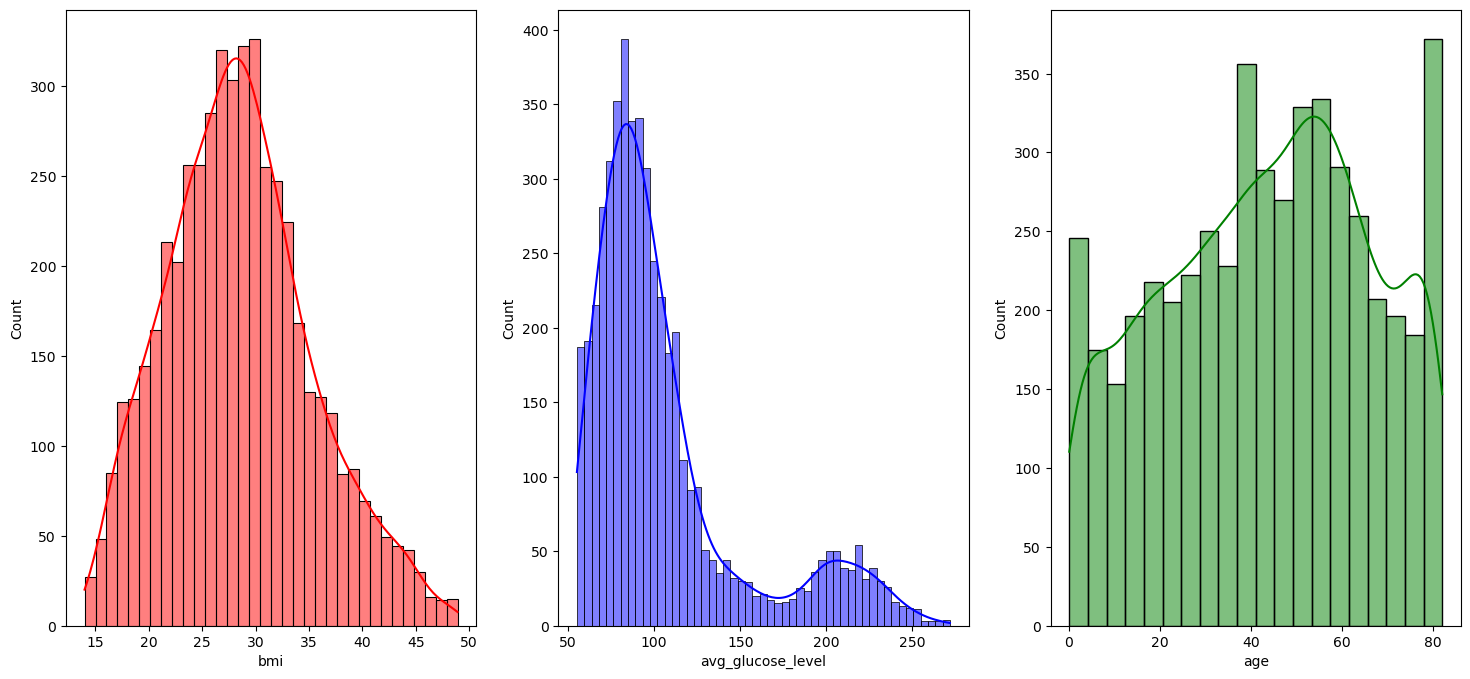

In [24]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,3,1)
sns.histplot(data["bmi"],kde=True , color= "r")

plt.subplot(1,3,2)
sns.histplot(data["avg_glucose_level"],kde=True, color="b")

plt.subplot(1,3,3)
sns.histplot(data["age"],kde=True , color="g")



plt.show()

In [25]:
data.skew()

age                 -0.144001
hypertension         2.740377
heart_disease        3.896191
avg_glucose_level    1.587526
bmi                  0.371553
stroke               4.140942
dtype: float64

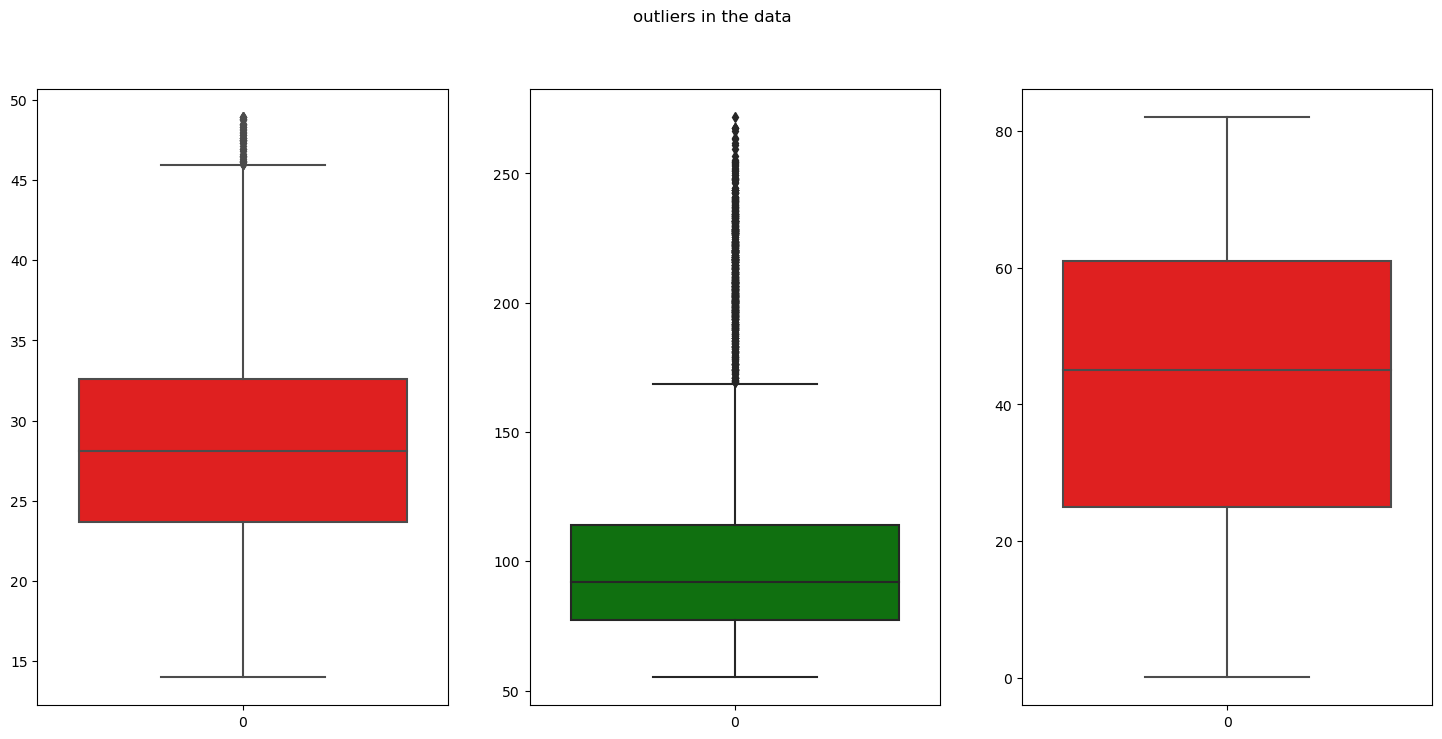

In [26]:
#visualize the outliers

plt.subplot(1,3,1)
sns.boxplot(data["bmi"], color="red")

plt.subplot(1,3,2)
sns.boxplot(data["avg_glucose_level"], color= "green")

plt.subplot(1,3,3)
sns.boxplot(data["age"], color = "red")

plt.suptitle('outliers in the data')
plt.show()




# Data Preparation

In [27]:
data.isnull().sum()/len(data)*100 # checking  missing values


gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [28]:
from sklearn.preprocessing import LabelEncoder  #Encoding
enc=LabelEncoder()


In [29]:
gender=enc.fit_transform(data["gender"])
ever_married =enc.fit_transform(data["ever_married"])
work_type=enc.fit_transform(data["work_type"])
Residence_type =enc.fit_transform(data["Residence_type"])
smoking_status=enc.fit_transform(data["smoking_status"])

In [30]:
data["gender"]=gender
data["ever_married"]=ever_married
data["work_type"]=work_type
data["Residence_type"]=Residence_type
data["smoking_status"]=smoking_status

In [31]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [32]:
#checking skewness it is right skewed
data[["bmi","avg_glucose_level", "age"]].skew()

bmi                  0.371553
avg_glucose_level    1.587526
age                 -0.144001
dtype: float64

In [33]:
from scipy.stats import boxcox   #applying boxcox Transformation 

data['avg_glucose_level'],b=boxcox(data["avg_glucose_level"])

In [34]:
data["avg_glucose_level"].skew() #now skewwness is very close to zero we can proceed 

0.08153786379593303

In [35]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,0.940492,36.6,1,1
1,1,80.0,0,1,1,1,0,0.936735,32.5,2,1
2,0,49.0,0,0,1,1,1,0.939423,34.4,3,1
3,0,79.0,1,0,1,2,0,0.939494,24.0,2,1
4,1,81.0,0,0,1,1,1,0.939767,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,0.933046,29.8,1,0
4977,1,40.0,0,0,1,1,1,0.939869,31.1,3,0
4978,0,45.0,1,0,1,0,0,0.935913,31.8,3,0
4979,1,40.0,0,0,1,1,0,0.934852,30.0,3,0


### Using Min Max scaler to bring all values on single scale

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col_name in data.columns:
    if data[col_name].nunique() > 5:
        data[col_name] = scaler.fit_transform(data[[col_name]])

# X and Y

In [41]:
x = data.drop("stroke",axis=1)
y = data["stroke"]

# Train-Test Split

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,shuffle=True)

# Machine Learning Modelling And Evalution


2.KNN

In [46]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Define the estimator and parameter grid
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors": list(range(1, 50))}

# Perform grid search
knn_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
knn_grid.fit(x_train, y_train)

# Best model
knn_model = knn_grid.best_estimator_

# Predictions
ypred_train = knn_model.predict(x_train)
ypred_test = knn_model.predict(x_test)

# Print accuracy scores
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Cross Validation Score:", cross_val_score(knn_model, x_train, y_train, cv=5, scoring='accuracy').mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.9512335054503729
Cross Validation Score: 0.9512334894122579
Test Accuracy: 0.9478260869565217


In [47]:
accuracy_score(y_test,ypred_test)

0.9478260869565217

In [48]:
from sklearn.metrics import confusion_matrix

# The matrix
confusion_mat = confusion_matrix(y_test, ypred_test)

confusion_mat

array([[1417,    0],
       [  78,    0]], dtype=int64)


# Decision Tree Classifier


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_clf=DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=5)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score   # accuracy 

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.94


In [51]:
from sklearn.metrics import confusion_matrix

# The matrix
confusion_mat = confusion_matrix(y_test, y_pred)

In [52]:
confusion_mat

array([[1405,   12],
       [  73,    5]], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score, classification_report

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1417
           1       0.29      0.06      0.11        78

    accuracy                           0.94      1495
   macro avg       0.62      0.53      0.54      1495
weighted avg       0.92      0.94      0.93      1495



In [60]:
from sklearn.model_selection import KFold #for K-fold cross validation
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Decision Tree','K-nn']
models=[DecisionTreeClassifier(),KNeighborsClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,x,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Decision Tree,0.900885,0.104197
K-nn,0.947875,0.123748
